In [124]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [125]:
# считуємо дані з файлу та перетворюємо тип риби в число
dataset = shuffle(pd.read_csv("../lab1/fish.csv"), random_state=42)
le = LabelEncoder()
dataset["Species"] = le.fit_transform(dataset["Species"])

In [126]:
# розбиваємо дані на тренувальні та тестові
X = dataset.drop(["Species", "Length2", "Length3"], axis=1)
Y = dataset["Species"]
print(X.shape, Y.shape)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

(159, 4) (159,)


In [127]:
# нормуємо дані
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [128]:
model = keras.Sequential([
    keras.layers.Input(shape=(4,)),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(7, activation='softmax')
])

In [129]:
model.compile(optimizer='sgd', loss='categorical_crossentropy')

In [130]:
model.fit(X_train, tf.one_hot(Y_train, 7), epochs=100, batch_size=16)

Epoch 1/100


8/8 [==============================] - 0s 4ms/step - loss: 2.1150
Epoch 2/100
8/8 [==============================] - 0s 5ms/step - loss: 2.0730
Epoch 3/100
8/8 [==============================] - 0s 5ms/step - loss: 2.0349
Epoch 4/100
8/8 [==============================] - 0s 4ms/step - loss: 1.9995
Epoch 5/100
8/8 [==============================] - 0s 3ms/step - loss: 1.9677
Epoch 6/100
8/8 [==============================] - 0s 3ms/step - loss: 1.9376
Epoch 7/100
8/8 [==============================] - 0s 5ms/step - loss: 1.9098
Epoch 8/100
8/8 [==============================] - 0s 4ms/step - loss: 1.8838
Epoch 9/100
8/8 [==============================] - 0s 3ms/step - loss: 1.8599
Epoch 10/100
8/8 [==============================] - 0s 2ms/step - loss: 1.8373
Epoch 11/100
8/8 [==============================] - 0s 4ms/step - loss: 1.8158
Epoch 12/100
8/8 [==============================] - 0s 4ms/step - loss: 1.7961
Epoch 13/100
8/8 [==============================] - 0s 3ms/step - loss: 1

In [131]:
Y_pred = model.predict(X_test)
print(Y_pred)

1/1 [==============================] - 0s 72ms/step
[[0.14371772 0.08923186 0.3692706  0.14015399 0.11233988 0.06597472
  0.07931126]
 [0.11392953 0.09571224 0.4467792  0.07556848 0.14147791 0.05754981
  0.0689828 ]
 [0.08087464 0.09719145 0.27426967 0.25876686 0.08718933 0.10345454
  0.09825347]
 [0.74536145 0.10906291 0.02225182 0.00936736 0.04537768 0.05782845
  0.01075037]
 [0.00878788 0.0766876  0.38534418 0.00906936 0.15444095 0.31607383
  0.04959634]
 [0.0053223  0.06666643 0.23279159 0.00442732 0.11745934 0.5409247
  0.03240823]
 [0.0616412  0.0933886  0.48362908 0.04781064 0.15797542 0.08440768
  0.07114738]
 [0.7133168  0.1161152  0.03096787 0.01180834 0.05376424 0.06099364
  0.01303391]
 [0.65794206 0.12707847 0.04939331 0.01509164 0.07051347 0.0624597
  0.01752133]
 [0.04196875 0.11455854 0.4059202  0.01765198 0.18386751 0.18085603
  0.055177  ]
 [0.7200155  0.11364502 0.02852019 0.01208971 0.05043567 0.06263907
  0.01265483]
 [0.05748286 0.09319144 0.18298744 0.3730114  0.

In [132]:
Y_pred = np.argmax(Y_pred, axis=1)
print(Y_pred)

[2 2 2 0 2 5 2 0 0 2 0 3 0 0 0 3 3 2 2 2 2 2 0 3 2 5 2 5 2 2 2 0]


In [133]:
print(accuracy_score(Y_test, Y_pred))

0.75


In [134]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           2       0.56      0.90      0.69        10
           3       1.00      0.67      0.80         6
           4       0.00      0.00      0.00         3
           5       0.67      0.50      0.57         4

    accuracy                           0.75        32
   macro avg       0.65      0.61      0.61        32
weighted avg       0.73      0.75      0.72        32



c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

<Axes: >

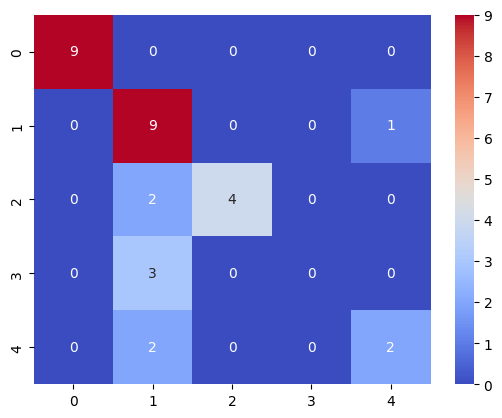

In [135]:
sns.heatmap(confusion_matrix(Y_test, Y_pred), cmap="coolwarm", annot=True, fmt="d")